In [35]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [36]:
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
X = iris_data.drop(['species'], axis=1).values
y = pd.get_dummies(iris_data.species, prefix='output').values
print(X.shape, y.shape)

(150, 4) (150, 3)


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# standardise data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
def create_model_multiple_output(learning_rate, dropoute_rate):
    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropoute_rate))
    model.add(Dense(6,activation='relu'))
    model.add(Dropout(dropoute_rate))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    adam = Adam(lr=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy'])
    return model

In [41]:
dropoute_rate = 0.1
epochs = 50
batch_size = 1
learning_rate = 0.001

In [42]:
model = create_model_multiple_output(learning_rate, dropoute_rate)

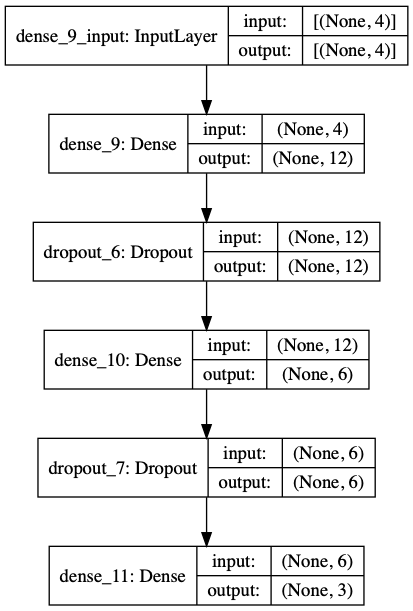

In [43]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="../images/model_plot2.png", show_shapes=True, show_layer_names=True)

In [44]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/50
96/96 [==============================] - 1s 2ms/step - loss: 0.7763 - accuracy: 0.3502 - val_loss: 0.6790 - val_accuracy: 0.6250
Epoch 2/50
96/96 [==============================] - 0s 962us/step - loss: 0.6904 - accuracy: 0.4188 - val_loss: 0.6403 - val_accuracy: 0.6667
Epoch 3/50
96/96 [==============================] - 0s 949us/step - loss: 0.6374 - accuracy: 0.6609 - val_loss: 0.6132 - val_accuracy: 0.7083
Epoch 4/50
96/96 [==============================] - 0s 959us/step - loss: 0.6196 - accuracy: 0.6558 - val_loss: 0.5783 - val_accuracy: 0.8333
Epoch 5/50
96/96 [==============================] - 0s 949us/step - loss: 0.6042 - accuracy: 0.6056 - val_loss: 0.5392 - val_accuracy: 0.9167
Epoch 6/50
96/96 [==============================] - 0s 991us/step - loss: 0.5558 - accuracy: 0.7011 - val_loss: 0.4865 - val_accuracy: 0.9167
Epoch 7/50
96/96 [==============================] - 0s 983us/step - loss: 0.4937 - accuracy: 0.7831 - val_loss: 0.4442 - val_accuracy: 0.9167
Epoch 8/

In [45]:
accuracies = model.evaluate(X_test, y_test, verbose=1)
print("test score", accuracies[0])
print("test accuracy", accuracies[1])

1/1 [==============================] - 0s 86ms/step - loss: 0.0687 - accuracy: 0.9667
test score 0.06866130977869034
test accuracy 0.9666666388511658


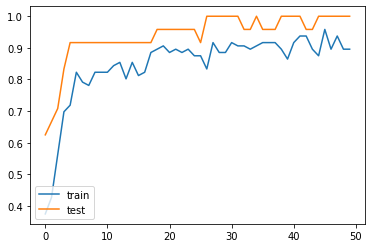

In [46]:
import matplotlib.pyplot as plt 
plt.plot(model_history.history['accuracy'], label="accuracy")
plt.plot(model_history.history['val_accuracy'], label="val_accuracy")
plt.legend(['train', 'test'], loc= "lower left")

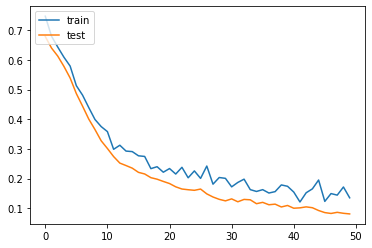

In [47]:
plt.plot(model_history.history['loss'], label="loss")
plt.plot(model_history.history['val_loss'], label="val_loss")
plt.legend(['train', 'test'], loc= "upper left")